<a href="https://colab.research.google.com/github/BartekPodgorski/Python/blob/main/Projects/Stackoverflow_report/DM_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
np.set_printoptions(precision=4, suppress=True)

In [ ]:
survey = pd.read_csv("survey_results_public.csv",
                     usecols=["JobSatisfaction","Gender","StackOverflowSatisfaction","Professional","JobSecurity","WorkStart","LearningNewTech","HomeRemote","YearsProgram","DeveloperType","FormalEducation","Salary"])

In [ ]:
survey.head()

,Professional,FormalEducation,HomeRemote,YearsProgram,DeveloperType,JobSatisfaction,LearningNewTech,JobSecurity,WorkStart,StackOverflowSatisfaction,Gender,Salary
0,Student,Secondary school,NaN,2.5,NaN,NaN,Agree,Strongly agree,6:00 AM,9.0,Male,NaN
1,Student,Some college/university study without earning ...,"More than half, but not all, the time",9.5,NaN,NaN,NaN,NaN,10:00 AM,8.0,Male,NaN
2,Professional developer,Bachelor's degree,"Less than half the time, but at least one day ...",20.0,Other,9.0,Strongly agree,Agree,9:00 AM,8.0,Male,113750.0
3,Professional non-developer who sometimes write...,Doctoral degree,"Less than half the time, but at least one day ...",14.5,NaN,3.0,Strongly agree,Somewhat agree,9:00 AM,10.0,Male,NaN
4,Professional developer,Master's degree,Never,20.0,Mobile developer; Graphics programming; Deskto...,8.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = survey.copy()

In [ ]:
df.dropna(subset = ["Salary"],inplace=True)

In [ ]:
df.DeveloperType.fillna(value="LD",inplace=True)
df.reset_index(drop=True, inplace=True)

In [ ]:
x = ';'.join(df['DeveloperType'])
z = list(set(x.split(sep=';')))
types = []
for item in z:
  if not item.startswith(" "):
    types.append(item)
    print(types)
for col in types:
  df[col] = 0

for index,row in enumerate(df['DeveloperType']):
  row_value = row.split(sep=';')
  row_value = map(lambda x: str.lstrip(x),row_value)
  for element in row_value:
    if element in types:
      df.loc[index,element]=1

['Quality assurance engineer']
['Quality assurance engineer', 'LD']
['Quality assurance engineer', 'LD', 'Web developer']
['Quality assurance engineer', 'LD', 'Web developer', 'Graphics programming']
['Quality assurance engineer', 'LD', 'Web developer', 'Graphics programming', 'Mobile developer']
['Quality assurance engineer', 'LD', 'Web developer', 'Graphics programming', 'Mobile developer', 'Desktop applications developer']
['Quality assurance engineer', 'LD', 'Web developer', 'Graphics programming', 'Mobile developer', 'Desktop applications developer', 'Database administrator']
['Quality assurance engineer', 'LD', 'Web developer', 'Graphics programming', 'Mobile developer', 'Desktop applications developer', 'Database administrator', 'Machine learning specialist']
['Quality assurance engineer', 'LD', 'Web developer', 'Graphics programming', 'Mobile developer', 'Desktop applications developer', 'Database administrator', 'Machine learning specialist', 'Graphic designer']
['Quality assu

In [ ]:
for index, item in enumerate(df.Gender):
  if item not in ["Male","Female","Other"]:
    df.loc[index,"Gender"] = "Other"

df.Gender.value_counts()

Male      10666
Other      1406
Female      819
Name: Gender, dtype: int64

In [ ]:
df.drop("DeveloperType",inplace=True,axis=1)

In [ ]:
# LD lack data special value
lack_columns = ["Professional","FormalEducation","HomeRemote","LearningNewTech","JobSecurity","WorkStart","Gender"]

for col in lack_columns:
  df[col].fillna(value="LD",inplace=True)
  df[col] = df[col].astype("category")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12891 entries, 0 to 12890
Data columns (total 26 columns):
 #   Column                                                 Non-Null Count  Dtype   
---  ------                                                 --------------  -----   
 0   Professional                                           12891 non-null  category
 1   FormalEducation                                        12891 non-null  category
 2   HomeRemote                                             12891 non-null  category
 3   YearsProgram                                           12879 non-null  float64 
 4   JobSatisfaction                                        12852 non-null  float64 
 5   LearningNewTech                                        12891 non-null  category
 6   JobSecurity                                            12891 non-null  category
 7   WorkStart                                              12891 non-null  category
 8   StackOverflowSatisfaction           

In [ ]:
numeric_col = ["YearsProgram","JobSatisfaction","StackOverflowSatisfaction"]

for col in numeric_col:
  df[col].fillna(method="backfill",inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12891 entries, 0 to 12890
Data columns (total 26 columns):
 #   Column                                                 Non-Null Count  Dtype   
---  ------                                                 --------------  -----   
 0   Professional                                           12891 non-null  category
 1   FormalEducation                                        12891 non-null  category
 2   HomeRemote                                             12891 non-null  category
 3   YearsProgram                                           12891 non-null  float64 
 4   JobSatisfaction                                        12891 non-null  float64 
 5   LearningNewTech                                        12891 non-null  category
 6   JobSecurity                                            12891 non-null  category
 7   WorkStart                                              12891 non-null  category
 8   StackOverflowSatisfaction           

In [ ]:
df.isnull().sum()

Professional                                             0
FormalEducation                                          0
HomeRemote                                               0
YearsProgram                                             0
JobSatisfaction                                          0
LearningNewTech                                          0
JobSecurity                                              0
WorkStart                                                0
StackOverflowSatisfaction                                0
Gender                                                   0
Salary                                                   0
Quality assurance engineer                               0
LD                                                       0
Web developer                                            0
Graphics programming                                     0
Mobile developer                                         0
Desktop applications developer                          

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
YearsProgram,12891.0,11.662323,6.016941,0.5,6.50000,10.5,17.5,20.0
JobSatisfaction,12891.0,6.954775,2.131857,0.0,6.00000,7.0,8.0,10.0
StackOverflowSatisfaction,12891.0,8.516174,1.322813,0.0,8.00000,9.0,10.0,10.0
Salary,12891.0,56298.480641,39880.905277,0.0,26440.37184,50000.0,80000.0,197000.0
Quality assurance engineer,12891.0,0.034132,0.181576,0.0,0.00000,0.0,0.0,1.0
LD,12891.0,0.000155,0.012455,0.0,0.00000,0.0,0.0,1.0
Web developer,12891.0,0.731285,0.443308,0.0,0.00000,1.0,1.0,1.0
Graphics programming,12891.0,0.037468,0.189913,0.0,0.00000,0.0,0.0,1.0
Mobile developer,12891.0,0.209216,0.406764,0.0,0.00000,0.0,0.0,1.0
Desktop applications developer,12891.0,0.284462,0.451175,0.0,0.00000,0.0,1.0,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12891 entries, 0 to 12890
Data columns (total 26 columns):
 #   Column                                                 Non-Null Count  Dtype   
---  ------                                                 --------------  -----   
 0   Professional                                           12891 non-null  category
 1   FormalEducation                                        12891 non-null  category
 2   HomeRemote                                             12891 non-null  category
 3   YearsProgram                                           12891 non-null  float64 
 4   JobSatisfaction                                        12891 non-null  float64 
 5   LearningNewTech                                        12891 non-null  category
 6   JobSecurity                                            12891 non-null  category
 7   WorkStart                                              12891 non-null  category
 8   StackOverflowSatisfaction           

In [ ]:
df.describe(include="category").T

,count,unique,top,freq
Professional,12891,1,Professional developer,12891
FormalEducation,12891,9,Bachelor's degree,6407
HomeRemote,12891,8,A few days each month,5107
LearningNewTech,12891,6,Strongly agree,4421
JobSecurity,12891,6,LD,4014
WorkStart,12891,25,9:00 AM,3185
Gender,12891,3,Male,10666


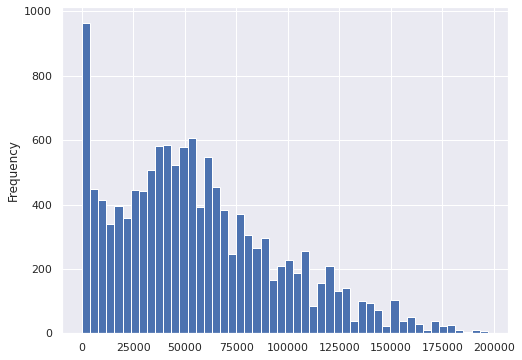

In [ ]:
df.Salary.plot(kind="hist",bins=50,figsize=(8,6))

In [ ]:
df_dummies = pd.get_dummies(df,drop_first=True)

In [ ]:
corr = df_dummies.corr()
corr

,YearsProgram,JobSatisfaction,StackOverflowSatisfaction,Salary,Quality assurance engineer,LD,Web developer,Graphics programming,Mobile developer,Desktop applications developer,Database administrator,Machine learning specialist,Graphic designer,Data scientist,DevOps specialist,Other,Embedded applications/devices developer,Developer with a statistics or mathematics background,Systems administrator,FormalEducation_Doctoral degree,FormalEducation_I never completed any formal education,FormalEducation_I prefer not to answer,FormalEducation_Master's degree,FormalEducation_Primary/elementary school,FormalEducation_Professional degree,FormalEducation_Secondary school,FormalEducation_Some college/university study without earning a bachelor's degree,HomeRemote_About half the time,HomeRemote_All or almost all the time (I'm full-time remote),HomeRemote_It's complicated,HomeRemote_LD,"HomeRemote_Less than half the time, but at least one day each week","HomeRemote_More than half, but not all, the time",HomeRemote_Never,LearningNewTech_Disagree,LearningNewTech_LD,LearningNewTech_Somewhat agree,LearningNewTech_Strongly agree,LearningNewTech_Strongly disagree,JobSecurity_Disagree,JobSecurity_LD,JobSecurity_Somewhat agree,JobSecurity_Strongly agree,JobSecurity_Strongly disagree,WorkStart_10:00 PM,WorkStart_11:00 AM,WorkStart_11:00 PM,WorkStart_1:00 AM,WorkStart_1:00 PM,WorkStart_2:00 AM,WorkStart_2:00 PM,WorkStart_3:00 AM,WorkStart_3:00 PM,WorkStart_4:00 AM,WorkStart_4:00 PM,WorkStart_5:00 AM,WorkStart_5:00 PM,WorkStart_6:00 AM,WorkStart_6:00 PM,WorkStart_7:00 AM,WorkStart_7:00 PM,WorkStart_8:00 AM,WorkStart_8:00 PM,WorkStart_9:00 AM,WorkStart_9:00 PM,WorkStart_LD,WorkStart_Midnight,WorkStart_Noon,Gender_Male,Gender_Other
YearsProgram,1.000000,0.048929,-0.053688,0.433901,0.008633,0.009498,-0.053900,0.037856,-0.043213,0.134937,0.042836,0.015598,-0.038456,0.033296,0.096121,0.120143,0.074218,0.062980,0.075825,0.111114,-0.009706,-0.003346,0.120890,0.009509,-0.004765,-0.058972,0.028442,0.002279,0.096895,0.024977,-0.008179,0.034955,0.009778,-0.104300,0.004655,-0.013923,0.038182,-0.032881,-0.007348,0.020078,-0.013979,0.018008,-0.019777,-0.010377,-0.012007,-0.010800,-0.026827,-0.007588,0.000409,-0.014465,-0.007458,-0.012428,0.010369,0.013959,-0.003627,0.014719,-0.026288,0.018020,-0.015973,0.052679,-0.003126,0.030587,-0.004713,0.006741,-0.022120,-0.088410,-0.013356,-0.018205,0.123050,-0.084198
JobSatisfaction,0.048929,1.000000,0.075155,0.121449,0.002184,-0.008501,-0.000957,0.015874,0.022632,-0.023565,-0.011178,0.015126,-0.003501,0.022162,0.032373,0.030813,-0.007529,0.000487,-0.002525,0.022524,0.001985,-0.016637,-0.001694,-0.008661,0.001899,0.021989,0.033306,0.001407,0.060664,-0.010956,0.004912,0.020457,-0.000028,-0.100557,-0.036460,-0.000508,-0.012056,0.007815,-0.024711,-0.014490,-0.001137,-0.039990,0.030310,-0.008771,-0.011999,0.005570,-0.016354,-0.017251,0.001647,-0.002630,-0.023501,-0.002195,0.019058,-0.004369,0.001123,0.010714,0.000916,-0.005307,-0.023041,0.004333,-0.012037,0.016671,-0.019976,0.010381,-0.007874,-0.019975,0.009296,-0.005434,0.023242,-0.030866
StackOverflowSatisfaction,-0.053688,0.075155,1.000000,-0.071063,-0.004237,0.004556,0.049217,-0.015228,0.012815,-0.010114,0.023585,0.006446,0.011853,0.010174,-0.031338,-0.047535,-0.014492,-0.018256,-0.000091,-0.009538,0.014673,-0.025085,-0.001413,-0.012947,0.016343,-0.010901,-0.012854,-0.004762,-0.018624,0.007799,-0.005014,0.001987,0.003785,0.017541,0.001421,-0.010122,-0.039654,0.084132,-0.011086,0.008317,-0.010629,-0.017970,0.022595,0.019046,-0.011929,0.000486,-0.009879,0.005396,-0.018794,0.006008,0.001383,-0.003654,-0.026835,0.007465,-0.021762,-0.012116,0.006274,0.004802,-0.020976,0.005717,0.004347,0.004225,0.011118,0.014819,-0.000002,0.015759,-0.007369,-0.004417,0.027699,-0.023656
Salary,0.433901,0.121449,-0.071063,1.000000,0.000587,0.006136,-0.055037,-0.015266,-0.071263,0.000860,-0.025454,0.045025,-0.043798,0.034127,0.091167,0.120809,0.017225,0.052826,0.000295,0.085009,-0.020350,-0.026735,0.0

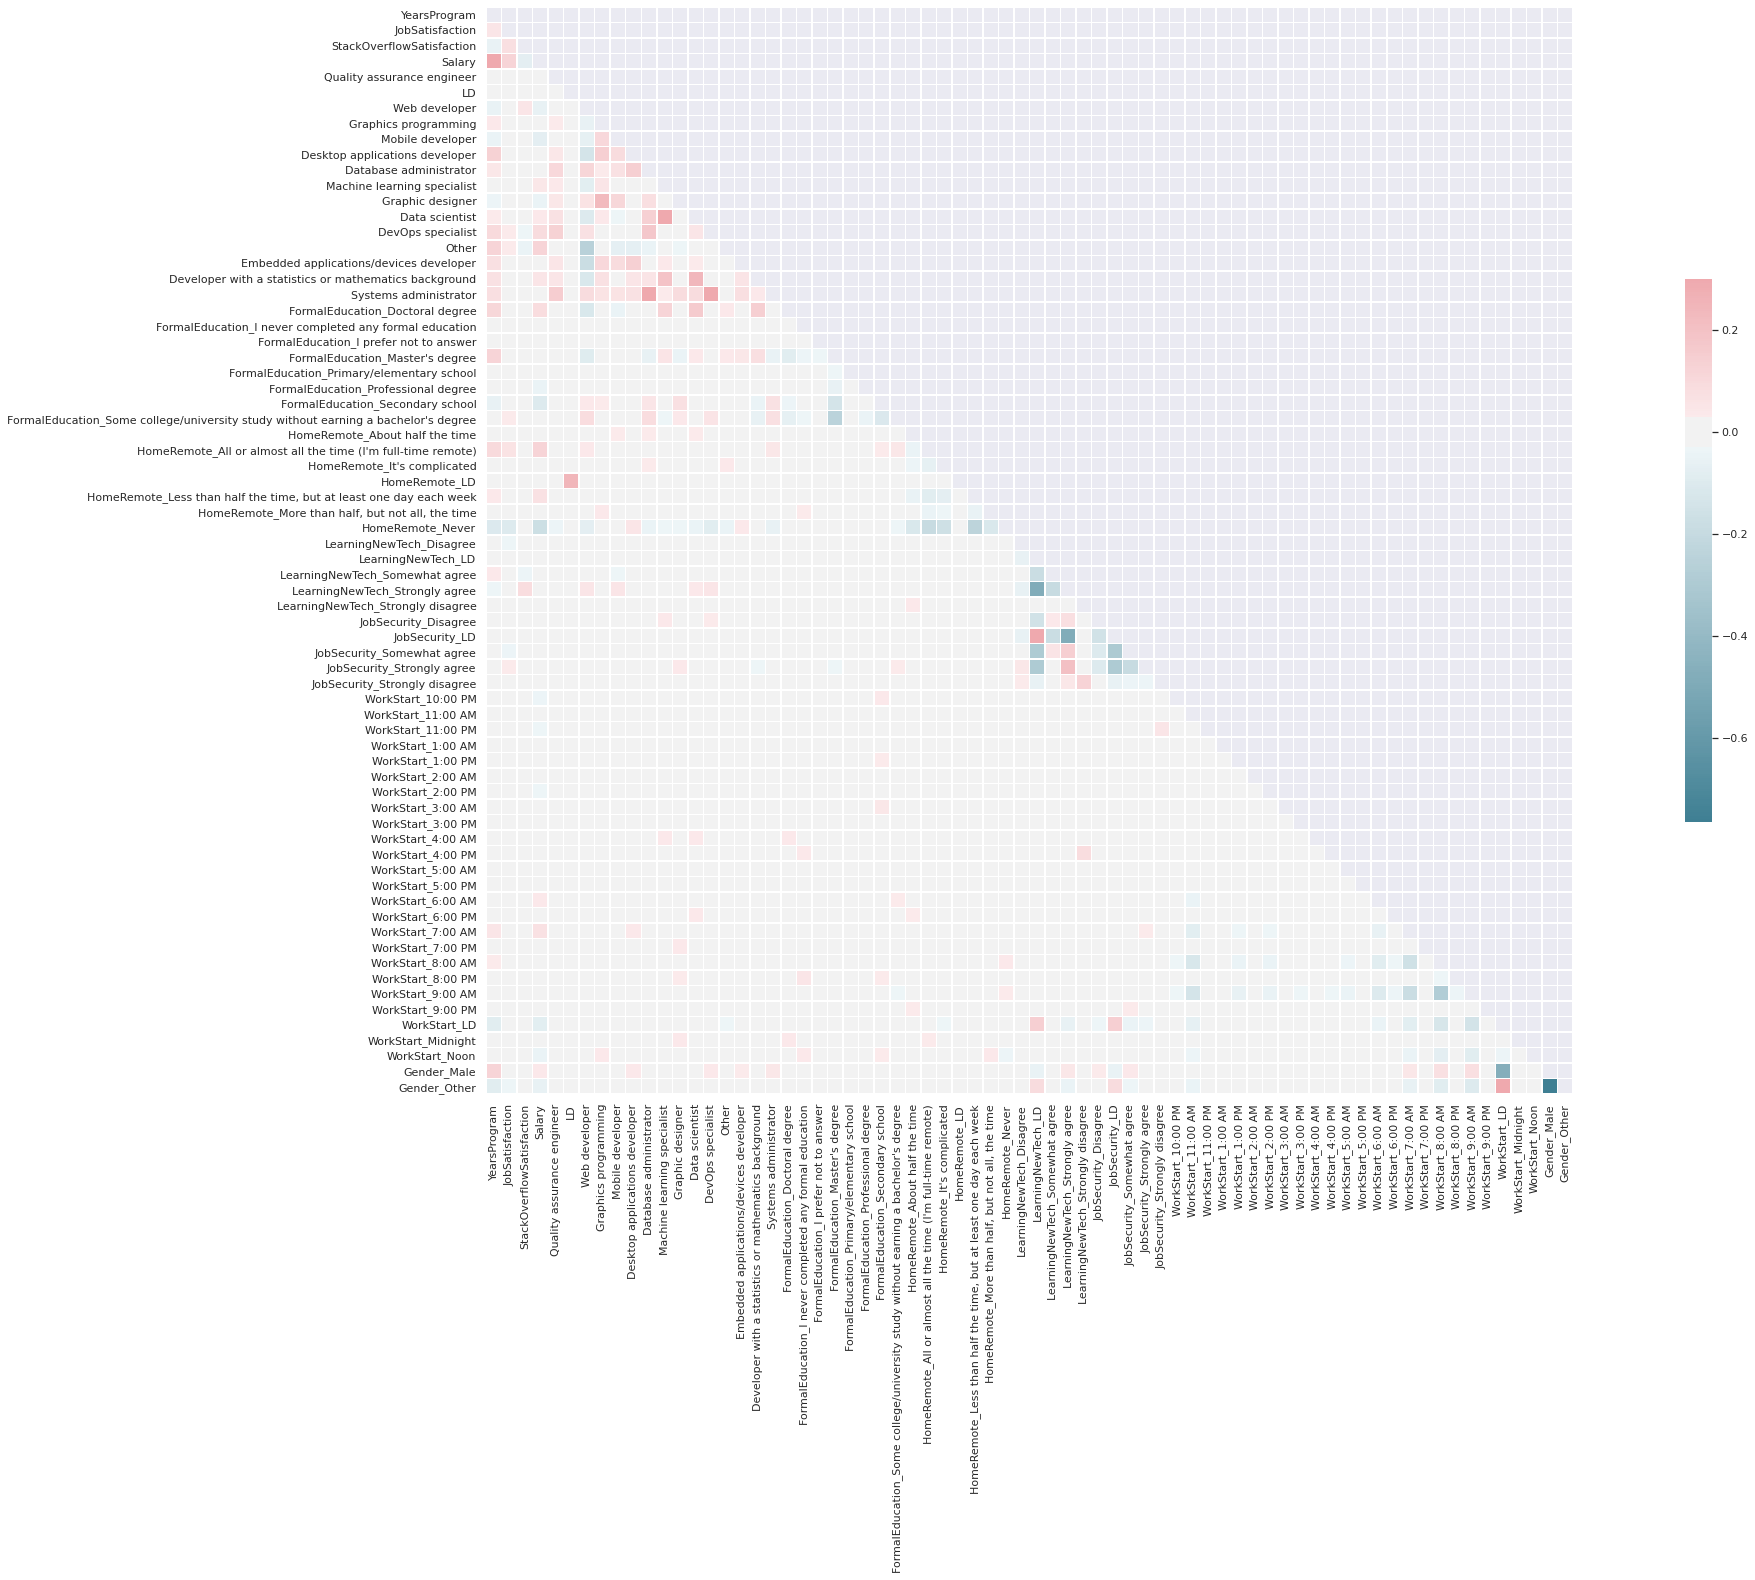

In [ ]:
sns.set(style="darkgrid")
mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(40,20))
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr,mask=mask,cmap=cmap, vmax=0.3,center=0,
            square=True,linewidth=0.5,cbar_kws={"shrink": 0.5})

In [ ]:
df_dummies

,YearsProgram,JobSatisfaction,StackOverflowSatisfaction,Salary,Quality assurance engineer,LD,Web developer,Graphics programming,Mobile developer,Desktop applications developer,Database administrator,Machine learning specialist,Graphic designer,Data scientist,DevOps specialist,Other,Embedded applications/devices developer,Developer with a statistics or mathematics background,Systems administrator,FormalEducation_Doctoral degree,FormalEducation_I never completed any formal education,FormalEducation_I prefer not to answer,FormalEducation_Master's degree,FormalEducation_Primary/elementary school,FormalEducation_Professional degree,FormalEducation_Secondary school,FormalEducation_Some college/university study without earning a bachelor's degree,HomeRemote_About half the time,HomeRemote_All or almost all the time (I'm full-time remote),HomeRemote_It's complicated,HomeRemote_LD,"HomeRemote_Less than half the time, but at least one day each week","HomeRemote_More than half, but not all, the time",HomeRemote_Never,LearningNewTech_Disagree,LearningNewTech_LD,LearningNewTech_Somewhat agree,LearningNewTech_Strongly agree,LearningNewTech_Strongly disagree,JobSecurity_Disagree,JobSecurity_LD,JobSecurity_Somewhat agree,JobSecurity_Strongly agree,JobSecurity_Strongly disagree,WorkStart_10:00 PM,WorkStart_11:00 AM,WorkStart_11:00 PM,WorkStart_1:00 AM,WorkStart_1:00 PM,WorkStart_2:00 AM,WorkStart_2:00 PM,WorkStart_3:00 AM,WorkStart_3:00 PM,WorkStart_4:00 AM,WorkStart_4:00 PM,WorkStart_5:00 AM,WorkStart_5:00 PM,WorkStart_6:00 AM,WorkStart_6:00 PM,WorkStart_7:00 AM,WorkStart_7:00 PM,WorkStart_8:00 AM,WorkStart_8:00 PM,WorkStart_9:00 AM,WorkStart_9:00 PM,WorkStart_LD,WorkStart_Midnight,WorkStart_Noon,Gender_Male,Gender_Other
0,20.0,9.0,8.0,113750.00000,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,20.0,8.0,8.0,100000.00000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,20.0,8.0,8.0,130000.00000,1,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,2.5,3.0,8.0,82500.00000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,10.5,9.0,8.0,100764.00000,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12886,10.5,7.0,8.0,74193.54839,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
12887,5.5,10.0,10.0,107526.88170,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
12888,5.5,5.0,7.0,32258.06452,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
12889,6.5,3.0,9.0,58000.00000,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [ ]:
data = df_dummies.copy()

In [ ]:
data.drop("Salary",axis=1,inplace=True)

In [ ]:
data

,YearsProgram,JobSatisfaction,StackOverflowSatisfaction,Quality assurance engineer,LD,Web developer,Graphics programming,Mobile developer,Desktop applications developer,Database administrator,Machine learning specialist,Graphic designer,Data scientist,DevOps specialist,Other,Embedded applications/devices developer,Developer with a statistics or mathematics background,Systems administrator,FormalEducation_Doctoral degree,FormalEducation_I never completed any formal education,FormalEducation_I prefer not to answer,FormalEducation_Master's degree,FormalEducation_Primary/elementary school,FormalEducation_Professional degree,FormalEducation_Secondary school,FormalEducation_Some college/university study without earning a bachelor's degree,HomeRemote_About half the time,HomeRemote_All or almost all the time (I'm full-time remote),HomeRemote_It's complicated,HomeRemote_LD,"HomeRemote_Less than half the time, but at least one day each week","HomeRemote_More than half, but not all, the time",HomeRemote_Never,LearningNewTech_Disagree,LearningNewTech_LD,LearningNewTech_Somewhat agree,LearningNewTech_Strongly agree,LearningNewTech_Strongly disagree,JobSecurity_Disagree,JobSecurity_LD,JobSecurity_Somewhat agree,JobSecurity_Strongly agree,JobSecurity_Strongly disagree,WorkStart_10:00 PM,WorkStart_11:00 AM,WorkStart_11:00 PM,WorkStart_1:00 AM,WorkStart_1:00 PM,WorkStart_2:00 AM,WorkStart_2:00 PM,WorkStart_3:00 AM,WorkStart_3:00 PM,WorkStart_4:00 AM,WorkStart_4:00 PM,WorkStart_5:00 AM,WorkStart_5:00 PM,WorkStart_6:00 AM,WorkStart_6:00 PM,WorkStart_7:00 AM,WorkStart_7:00 PM,WorkStart_8:00 AM,WorkStart_8:00 PM,WorkStart_9:00 AM,WorkStart_9:00 PM,WorkStart_LD,WorkStart_Midnight,WorkStart_Noon,Gender_Male,Gender_Other
0,20.0,9.0,8.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,20.0,8.0,8.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,20.0,8.0,8.0,1,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,2.5,3.0,8.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,10.5,9.0,8.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12886,10.5,7.0,8.0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
12887,5.5,10.0,10.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
12888,5.5,5.0,7.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
12889,6.5,3.0,9.0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [ ]:
target = df_dummies.Salary

In [ ]:
target.head()

0    113750.0
1    100000.0
2    130000.0
3     82500.0
4    100764.0
Name: Salary, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data,target,test_size=0.2)
print(f"X_train shape:{X_train.shape}")
print(f"X_test shape:{X_test.shape}")
print(f"y_train shape:{y_train.shape}")
print(f"y_test shape:{y_test.shape}")

X_train shape:(10312, 69)
X_test shape:(2579, 69)
y_train shape:(10312,)
y_test shape:(2579,)


In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(f"R2 score:{regressor.score(X_test,y_test):.4f}")

R2 score:0.2328


In [ ]:
y_pred = regressor.predict(X_test)
y_true = y_test.copy()
predictions = pd.DataFrame(data = {"y_true":y_true,"y_pred":y_pred})
predictions["error"] = predictions["y_true"] - predictions["y_pred"]
predictions.head()

,y_true,y_pred,error
11898,2642.783732,48096.376704,-45453.592972
6134,22929.936310,48423.475318,-25493.539008
4304,52335.483870,52526.728892,-191.245022
1623,110000.000000,93580.593775,16419.406225
9442,58000.000000,47335.960597,10664.039403


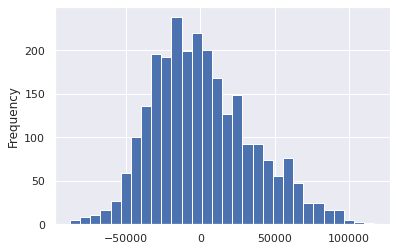

In [ ]:
predictions.error.plot(kind="hist",bins=30)

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_true,y_pred)
print(f"MAE wynosi:{mae:.2f}")

MAE wynosi:27094.85


In [ ]:
regressor.intercept_

37642.465536581265

In [ ]:
regressor.coef_

array([  2703.9167,   1629.7661,  -1339.3017,   -150.0437,   -346.9833,
        -2337.4501,  -4772.923 ,  -3817.6004,  -2478.6587,  -3899.3095,
         7777.5155,  -1305.3046,    377.8693,   6212.0989,   5443.7231,
         1135.1007,   1797.4781,  -3120.3933,    685.0461, -11108.03  ,
       -22816.4362,  -4719.2999,  -4129.2375, -17760.3349, -13014.6168,
        -4588.6144,  -2200.9597,  10794.2923,  -4017.3125,   3600.9955,
         3551.4463,  -4444.7496,  -8007.0375,  -2663.4225,  13192.3242,
         2367.2076,     58.4829,  13308.5443,     18.4496, -12627.4932,
         -526.643 ,   2181.2319,   2295.297 , -25501.1487,  -3578.3278,
       -25374.0261, -39457.838 ,   2294.0619, -30769.4121, -14365.2874,
       -23815.4206, -12882.2503,  -6315.4617,  -6716.4516,   4736.8709,
        -6794.1192,   4491.9645, -11138.3858,   3449.4924, -18525.6225,
        -2179.7512,  -7326.9485,  -1672.559 ,  -6808.6781,  -8847.44  ,
       -35165.9969, -10237.5928,  -4913.7658,  -3217.0189])

In [ ]:
import statsmodels.api as sm
X_train_numpy = X_train.values
X_train_numpy = sm.add_constant(X_train_numpy)
num_vars = len(X_train_numpy[0])
predictors = ["const"] + list(X_train.columns)
s1 = 0.01

for i  in range(0,num_vars):
  ols = sm.OLS(endog=y_train,exog=X_train_numpy).fit()
  max_pval = max(ols.pvalues.astype("float"))
  if max_pval > s1:
    for j in range(0,num_vars-i):
      if ols.pvalues[j].astype("float") == max_pval:
        X_train_numpy = np.delete(X_train_numpy, j ,axis=1)
        predictors.remove(predictors[j])

print(ols.summary(xname=predictors))

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     126.9
Date:                Fri, 29 May 2020   Prob (F-statistic):               0.00
Time:                        09:40:18   Log-Likelihood:            -1.2241e+05
No. Observations:               10312   AIC:                         2.449e+05
Df Residuals:                   10283   BIC:                         2.451e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                                                                        coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------